## <div align='center'> <font color= "red"> PERFORMANCE OLCUM METRIKLERI

#### Bu ödevde, bir önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

#### *Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.
##### *ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin.

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')  

In [2]:
titanic = pd.read_csv('data/titanic_data.csv')

In [3]:
titanic['Age']= titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked']= titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
X= titanic[['Pclass','PassengerId','Age','SibSp', 'Parch', 'Fare']]
y= titanic.Survived

X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=40)

In [6]:
survided_tahmin = LogisticRegression(random_state=40)
survided_tahmin.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
pred_train = survided_tahmin.predict(X_train)
pred_test  = survided_tahmin.predict(X_test)

### <font color='dark red'> *Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.

### <font color='dark pink'> confusion_matrix

In [8]:
from sklearn.metrics import confusion_matrix as cm

In [9]:
confusion_matrix_train = cm(y_train,pred_train)
confusion_matrix_test = cm(y_test,pred_test)

print('Hata Matrixi egitim Verileri', '--'*20, confusion_matrix_train, sep='\n')
print('Hata Matrixi test Verileri', '--'*20, confusion_matrix_test, sep='\n')

Hata Matrixi egitim Verileri
----------------------------------------
[[105  12]
 [ 41  20]]
Hata Matrixi test Verileri
----------------------------------------
[[393  39]
 [200  81]]


In [10]:
TN = confusion_matrix_test[0][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
FN = confusion_matrix_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 393
Doğru pozitif sayısı   : 81
Yanlış pozitif sayısı  : 39
Yanlış negatif sayısı  : 200


### <font color='dark pink'> Accuracy

Doğru olarak sınıflandırılanların toplam sayıya oranına doğruluk diyoruz.

In [11]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  survided_tahmin.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, pred_test))

Modelden alınan doğruluk değeri :  0.664796633941094
Hesaplanan doğruluk değeri      :  0.664796633941094
accuracy_score() değeri         :  0.664796633941094


### <font color='dark pink'> Error Rate

Yanlış sayısının toplam sayıya oranıdır. " hataoranı=1−doğruluk "   olarak da gösterebiliriz.

In [12]:
Error_Rate = (FN+FP)/(FN + FP + TN + TP)
Error_Rate

0.33520336605890605

### <font color='dark pink'> Hassasiyet (Precision)

Hassasiyet pozitif olarak tahmin edilenlerin ne kadarının gerçekten pozitif olduğunu gösterir. 

In [13]:
Precision = (TP)/(FP+TP)
Precision

0.675

In [14]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, pred_test))

Hesaplanan doğruluk değeri      :  0.675
precision_score() değeri        :  0.675


### <font color='dark pink'>  Duyarlılık (Recall/Sensitivity)

Gerçekten pozitif olanların ne kadar başarılı tahmin edildiğidir. 

In [15]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, pred_test))

Hesaplanan doğruluk değeri   :  0.28825622775800713
recall_score() değeri        :  0.28825622775800713


### <font color='dark pink'> Özgünlük (Specificity)

Gerçekten negatif olanların ne kadar başarılı tahmin edildiğidir. Duyarlılığın zıttıdır.

In [16]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.9097222222222222


### <font color='dark pink'>  F1 (F1 Score)

Hassasiyet ve Duyarlılık değerlerinin ikisine birden bakma çok pratik olmayacağından, iki metriği de içeren F1 skorunu kullanmaktayız. Bu iki değerin ortalamasını almak veri adetleri göz önüne alındığında çok doğru bir sonuç vermeyecektir. Bu yüzden F1 skoru hesaplanırken bu iki değerin harmonik ortalaması alınmaktadır. Harmonik ortalama değerlerin terslerinin ortalamasının tersidir.

In [17]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, pred_test)
duyarlılık_değeri = recall_score(y_test, pred_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, pred_test))

Hesaplanan f1 skoru   :  0.4039900249376559
f1_score() değeri     :  0.4039900249376559


In [18]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, pred_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, pred_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, pred_test)))

print('\n')
metrikler =  precision_recall_fscore_support(y_test, pred_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       432
           1       0.68      0.29      0.40       281

   micro avg       0.66      0.66      0.66       713
   macro avg       0.67      0.60      0.59       713
weighted avg       0.67      0.66      0.62       713

f1_score() değeri        : 0.40
recall_score() değeri    : 0.29
precision_score() değeri : 0.68


Hassasiyet : [0.66273187 0.675     ]
Duyarlılık : [0.90972222 0.28825623]
F1 Skoru   : [0.76682927 0.40399002]


### <font color='dark pink'> ROC Eğrisi (ROC/AUC(Area Under Curve))

ROC eğrisinde X eksenindeki küçük değerler düşük sayıda yanlış pozitifi ve yüksek sayıda doğru negatifi gözterirken, y eksenindeki büyük değerler yüksek sayıda doğru pozitifi ve düşük sayıda yanlış negatifi gösterir.
Python'da ROC eğrisi için gereken değerleri (Doğru Pozitif oranı/ Yanlış Pozitif Oranı) metrics modülünde yer alan roc_curve fonksiyonu ile öğrenip çizebiliriz. AUC değerini ise yine metrics modülünden roc_auc_score fonksiyonu ile alabiririz. roc_curve fonksiyonuna parametre olarak gerçek değerleri ve predict_proba ile alınan tahmin skorunu giriyoruz.

In [19]:
tahmin_test_ihtimal = survided_tahmin.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<Figure size 640x480 with 1 Axes>

In [20]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.7214890602346118


### <font color='dark pink'> Hassasiyet/Duyarlılık Eğrisi

Hassasiyet Duyarlılık eğrisi sınıf sayılarında bir dengesizlik olduğu zaman kullanılan bir metriktir. Değişik eşik seviyeleri için hassasiyet ve duyarlılık değişimini gösterir. X ekseninde duyarlılık, y ekseninde de hassasiyet yer alır.

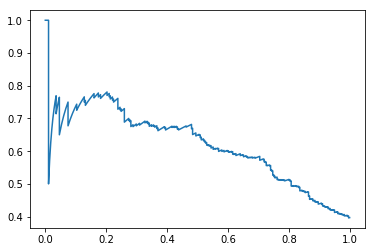

In [21]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

### <font color='dark pink'> Logaritmik Kayıp (Logarithmic Loss)

 Düşük log-loss değerleri daha iyi tahmin demektir. Hata oranı değerine benzemektedir. Ancak hata oranı değeri hesaplanırken gerçek değerden fark 1 ya da 0 olmakta iken, log-loss hesaplanırken gerçek değer ile tahmin ihtimali değeri dikkate alınır.

In [22]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, pred_test))

Logartimik Kayıp (log-loss) :  0.6092898974124357
Hata Oranı                  :  0.335203366058906


In [23]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train, y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.668539,0.647966
1,0.010,0.691011,0.661992
2,0.100,0.668539,0.671809
3,1.000,0.702247,0.664797
4,10.000,0.696629,0.681627
5,100.000,0.691011,0.683029
6,1000.000,0.691011,0.683029


Doğruluk değerlerine baktığımızda veri kümemiz için en uygun c değerinin varsayılan değer olan 10⁵ olduğunu görüyoruz. Bu degerden sora sayi ayni kaliyor.


### <font color='dark red'> *ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin.

Lojistik regresyonda modelin performansını değiştirecek "c" parametresi bulunmaktadır. Bu parametre daha önce regresyon dersinde gördüğümüz "λ değerinin tersidir.

<div align ="center">c=1/λ

In [25]:
survided_tahmin = LogisticRegression(random_state=40, C=10 )
survided_tahmin.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
titanic=titanic._get_numeric_data()

In [27]:
X= titanic.drop('Survived', axis=1)
y= titanic.Survived

X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=40)

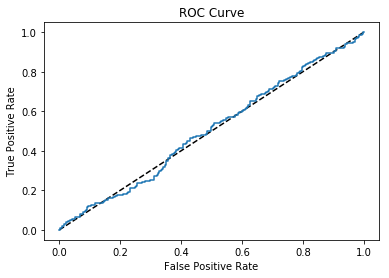

In [28]:
tahmin_test_ihtimal = survided_tahmin.predict_proba(X_test)[:,1]

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

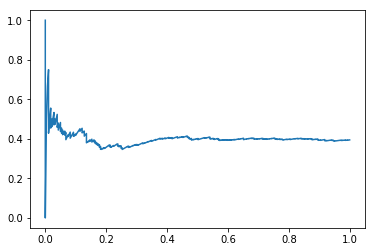

In [29]:
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [30]:
survided_tahmin = LogisticRegression(random_state=40, C= 0.001)
survided_tahmin.fit(X_train,y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=40, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
X= titanic.drop('Survived', axis=1)
y= titanic.Survived

X_train, X_test,y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=40)

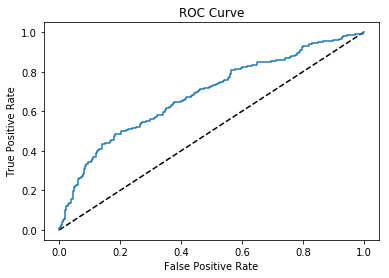

In [32]:
tahmin_test_ihtimal = survided_tahmin.predict_proba(X_test)[:,1]

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

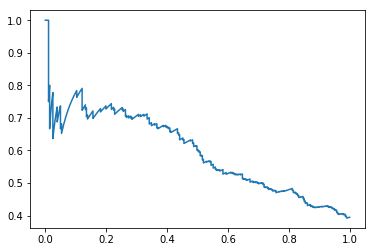

In [33]:
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()